In [1]:
# 导入相关的包
from autogluon.vision import ObjectDetector

timm installed but torch is required to enable it.


In [2]:
# 加载数据
dataset_train = ObjectDetector.Dataset.from_voc('train', splits='train')

In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/awslabs/autogluon/issues/1559

Presets specified: ['good_quality_fast_inference']
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 4
Randomly split train_data into train[2875]/validation[325] splits.
Starting HPO experiments


  0%|          | 0/512 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.dataset_root    ~/.mxnet/datasets/ != auto
root.num_workers     4 != 40
root.valid.batch_size 16 != 8
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 20
root.train.batch_size 16 != 8
root.train.lr        0.001 != 0.0001
root.train.epochs    20 != 50
root.train.seed      233 != 721
root.train.early_stop_max_value 1.0 != inf
root.dataset         voc_tiny != auto
root.ssd.base_network vgg16_atrous != resnet50_v1
root.ssd.data_shape  300 != 512
}
Saved config to /home/Enderfga/emotion/837f94e2/.trial_0/config.yaml
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[13:23:46] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[Epoch 0][Batch 99], Speed: 0.111306 samples/sec, CrossE

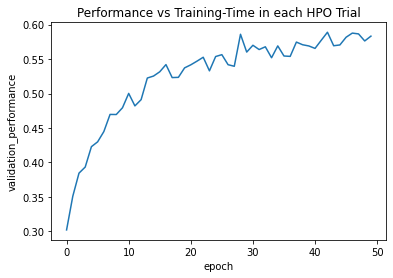

Finished, total runtime is 8376.84 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0, 1, 2, 3],
                   'horovod': False,
                   'num_workers': 40,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                       

In [3]:
# 训练模型
time_limit = 60*60*4  # at most 4 hour
detector = ObjectDetector()
detector.fit(dataset_train, time_limit=time_limit, presets='good_quality_fast_inference')

In [4]:
# 保存模型
savefile = 'detector2.ag'
detector.save(savefile)

In [6]:
# 加载模型
new_detector = ObjectDetector.load('/home/Enderfga/emotion/detector2.ag',verbosity=0)

/home/Enderfga/data1/anaconda3/envs/nlp/lib/python3.7/site-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [8]:
# 预测结果
bulk_result = new_detector.predict(dataset_train)
print(bulk_result)

[21:11:01] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[21:11:27] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[21:11:58] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[21:12:16] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[21:12:33] src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests t

       predict_class  predict_score  \
0       heightworker       0.700292   
1       heightworker       0.672959   
2       heightworker       0.643593   
3       heightworker       0.350276   
4       heightworker       0.312996   
...              ...            ...   
306337        nobelt       0.038863   
306338        nobelt       0.038397   
306339  standardbelt       0.038192   
306340  heightworker       0.037805   
306341  heightworker       0.037645   

                                             predict_rois  \
0       {'xmin': 0.4158405363559723, 'ymin': 0.2798240...   
1       {'xmin': 0.4895811975002289, 'ymin': 0.2275337...   
2       {'xmin': 0.5889867544174194, 'ymin': 0.3096078...   
3       {'xmin': 0.7787730693817139, 'ymin': 0.9041902...   
4       {'xmin': 0.6774665713310242, 'ymin': 0.4684889...   
...                                                   ...   
306337  {'xmin': 0.6894903779029846, 'ymin': 0.2435063...   
306338  {'xmin': 0.0, 'ymin': 0.69063878059

In [9]:
# 保存为csv文件方便后续处理
bulk_result.to_csv('/home/Enderfga/emotion/bulk_result.csv')